In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


/tmp/ipykernel_20/3870688284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

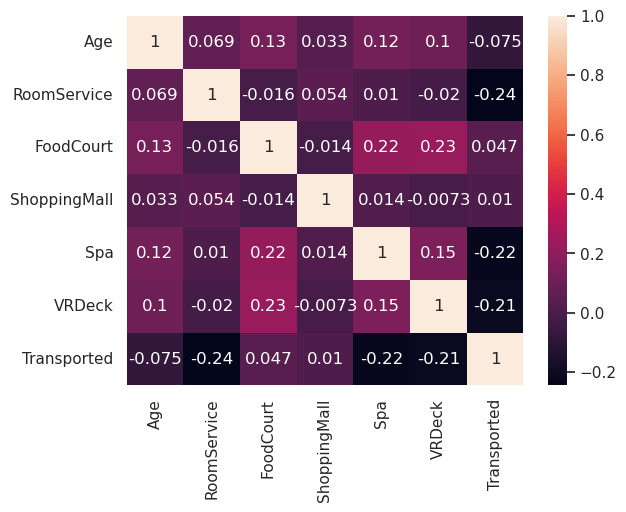

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True)

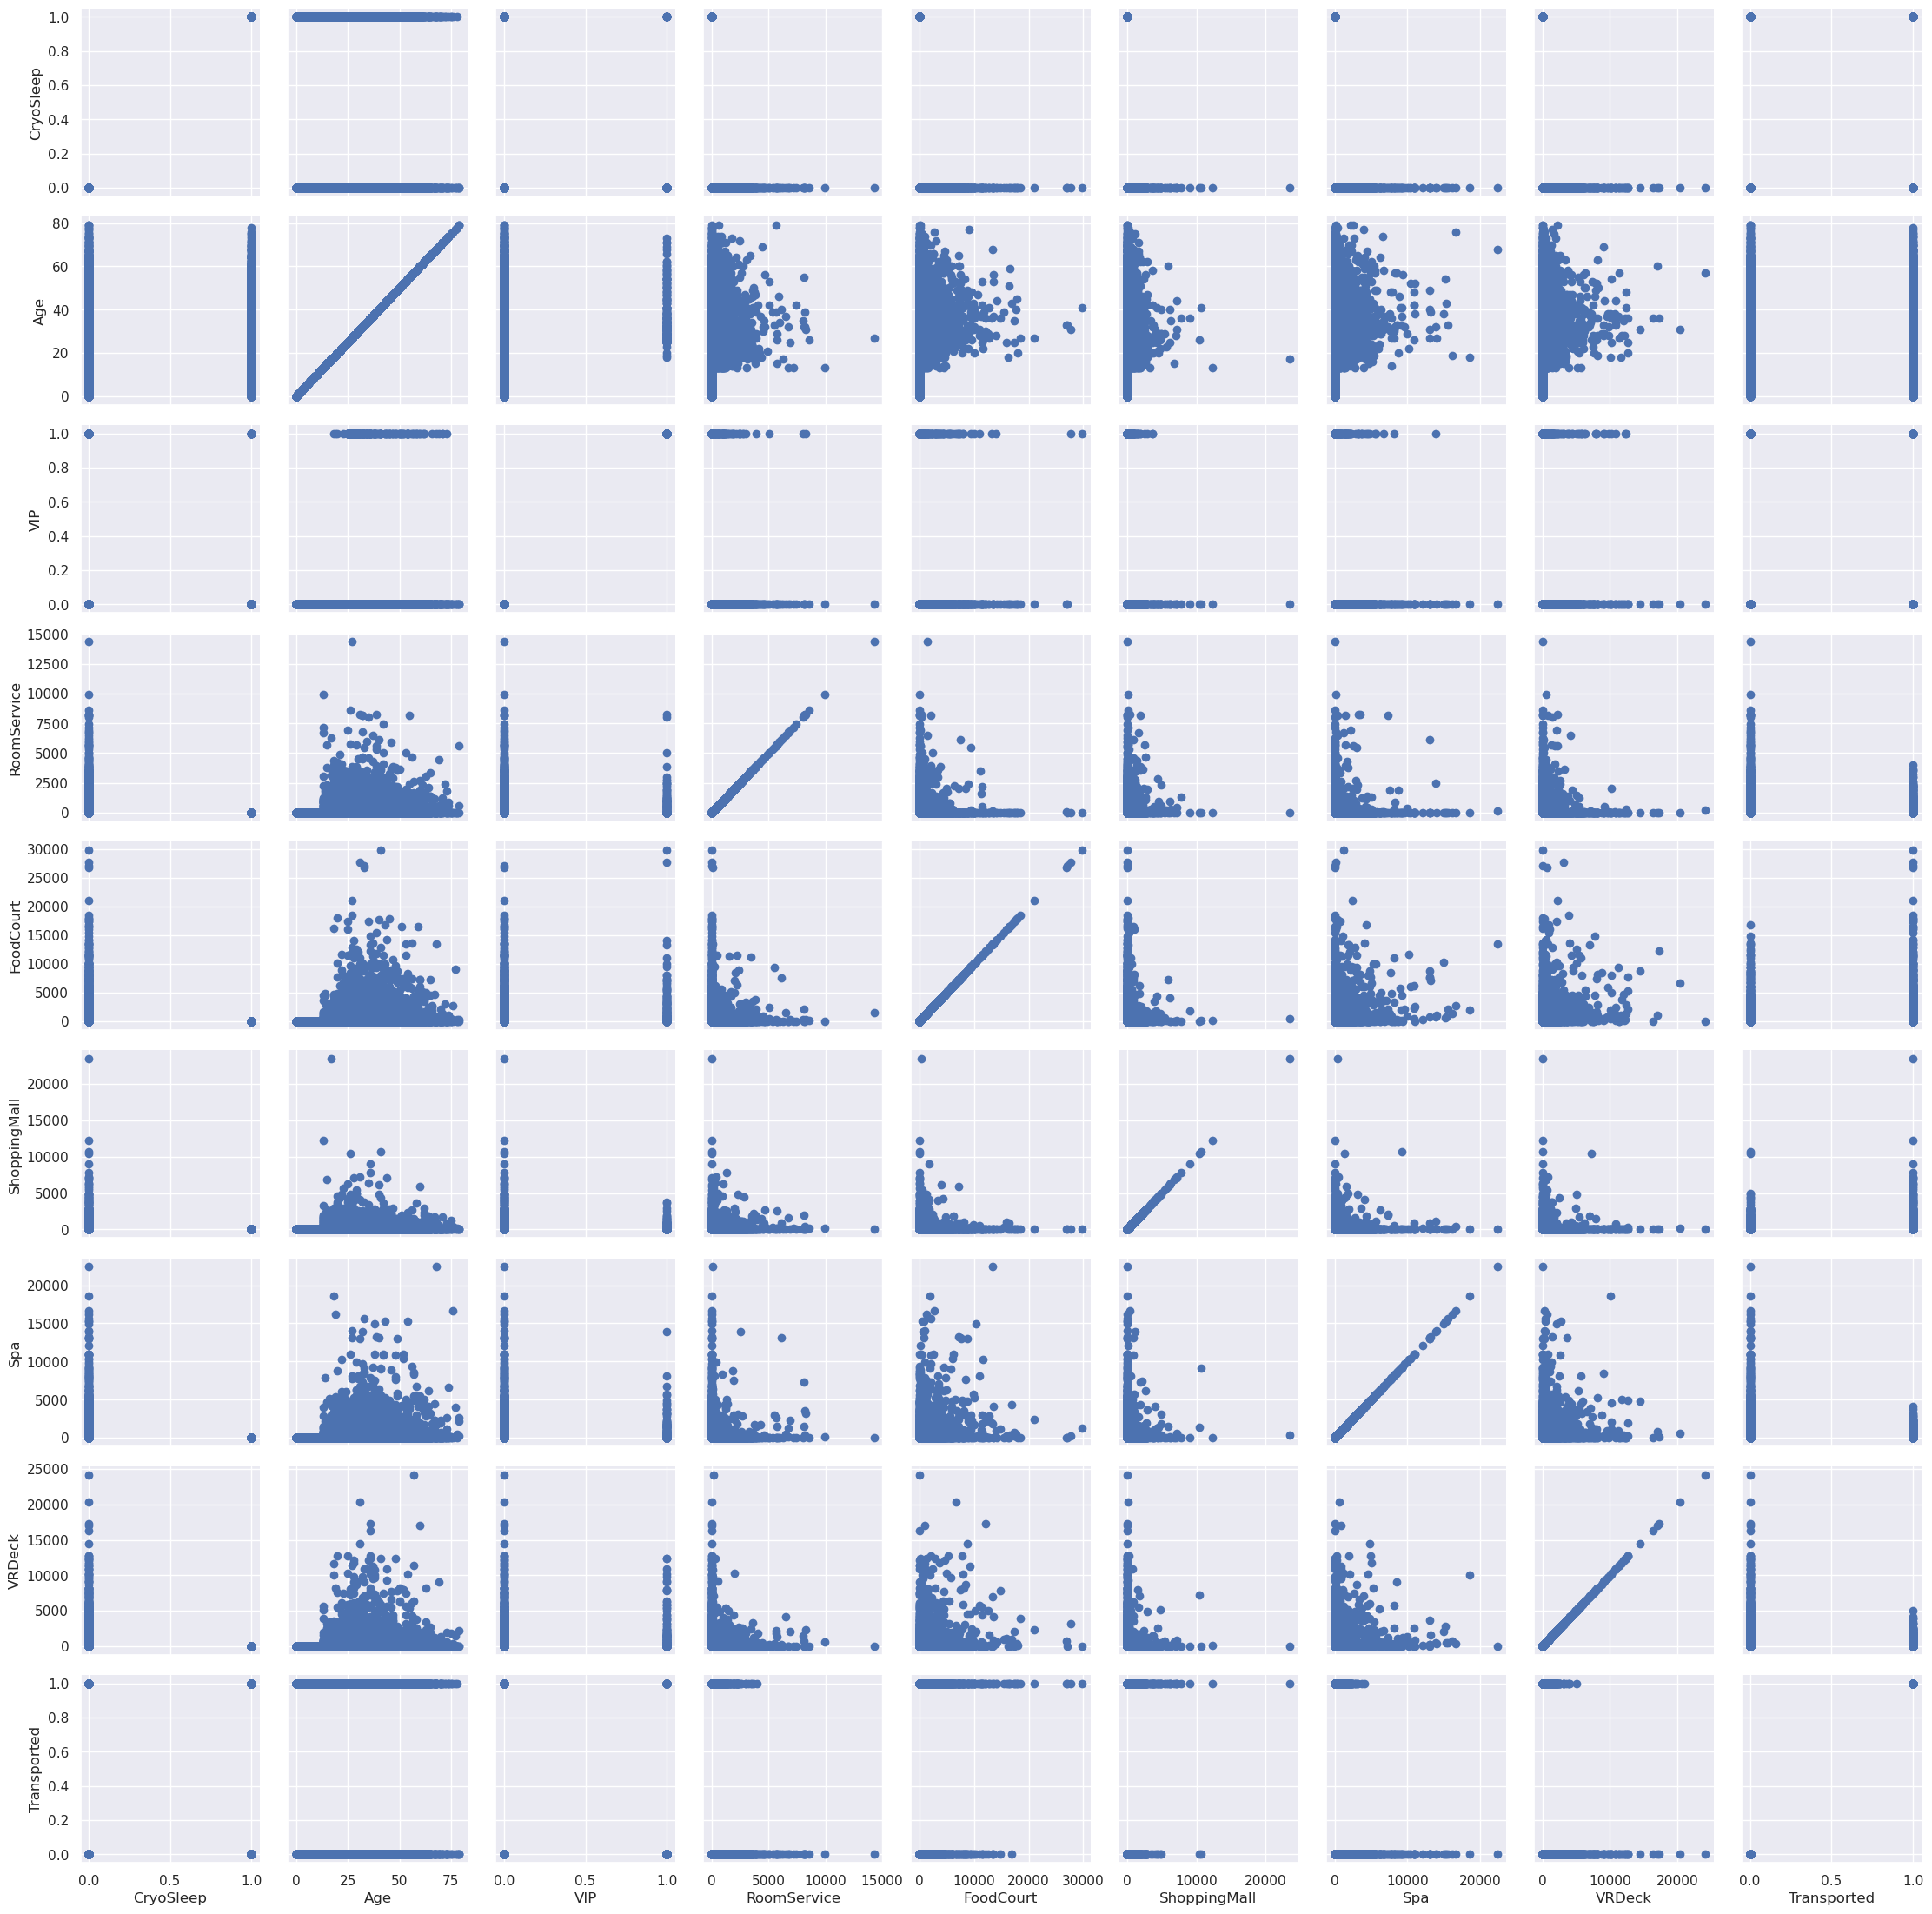

In [7]:
g=sns.PairGrid(df)
g.map(plt.scatter)

In [8]:
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: 1 if x==True else 0)

In [9]:
df['Cabin'].nunique()

6560

In [10]:
df[['Deck','Deck_Number','Deck_side']] = df['Cabin'].str.split("/", expand = True)

In [11]:
df = df.drop('Cabin', axis=1)

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Deck_Number,Deck_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [13]:
df['VIP'] = df['VIP'].apply(lambda x: 1 if x==True else 0)

In [14]:
df['Transported'] = df['Transported'].apply(lambda x: 1 if x==True else 0)

In [15]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Deck_Number     199
Deck_side       199
dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

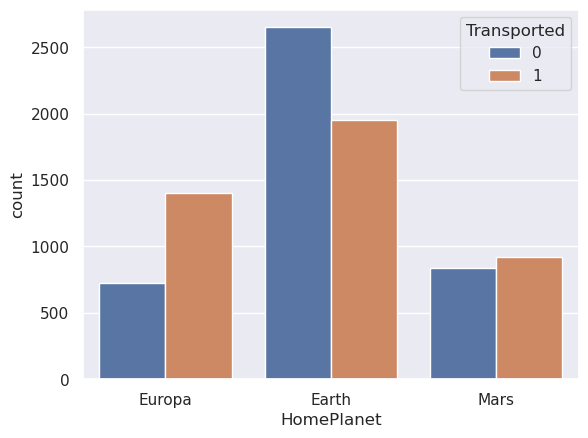

In [16]:
sns.countplot (x='HomePlanet',data=df, hue='Transported')

In [17]:
100*(df.isnull().sum()/len(df))

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       0.000000
Destination     2.093639
Age             2.059128
VIP             0.000000
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
Deck            2.289198
Deck_Number     2.289198
Deck_side       2.289198
dtype: float64

In [18]:
df= df.dropna()

In [19]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Deck_Number     0
Deck_side       0
dtype: int64

In [20]:
df.select_dtypes(include='object')

,PassengerId,HomePlanet,Destination,Name,Deck,Deck_Number,Deck_side
0,0001_01,Europa,TRAPPIST-1e,Maham Ofracculy,B,0,P
1,0002_01,Earth,TRAPPIST-1e,Juanna Vines,F,0,S
2,0003_01,Europa,TRAPPIST-1e,Altark Susent,A,0,S
3,0003_02,Europa,TRAPPIST-1e,Solam Susent,A,0,S
4,0004_01,Earth,TRAPPIST-1e,Willy Santantines,F,1,S
...,...,...,...,...,...,...,...
8688,9276_01,Europa,55 Cancri e,Gravior Noxnuther,A,98,P
8689,9278_01,Earth,PSO J318.5-22,Kurta Mondalley,G,1499,S
8690,9279_01,Earth,TRAPPIST-1e,Fayey Connon,G,1500,S
8691,9280_01,Europa,55 Cancri e,Celeon Hontichre,E,608,S


In [21]:
df.select_dtypes(include='object').columns

Index(['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Deck',
       'Deck_Number', 'Deck_side'],
      dtype='object')

In [22]:
df['Deck_Number'] = pd.to_numeric(df['Deck_Number'])

In [23]:
feature = df[['HomePlanet', 'Destination','Deck','Deck_side']]

In [24]:
dummies= pd.get_dummies(feature,drop_first=True)

In [25]:
df = pd.concat([df.drop(feature,axis=1),dummies],axis=1)

In [26]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck_Number,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_side_S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0,0,1,0,0,0,0,1,0,0,1


In [27]:
X = df.drop(['PassengerId','Name','Transported'],axis=1).values

In [28]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Deck_Number',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_side_S'],
      dtype='object')

In [29]:
y = df['Transported'].values

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler ()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
X_train = scaler.fit_transform (X_train)

In [35]:
X_test = scaler.transform (X_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()
model.add(Dense(21,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [39]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=256,
          validation_data=(X_test, y_test),callbacks=early_stop 
          )

Epoch 1/500
19/19 [==============================] - 2s 34ms/step - loss: 0.6834 - val_loss: 0.6759
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6722 - val_loss: 0.6629
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6605 - val_loss: 0.6463
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6481 - val_loss: 0.6302
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6326 - val_loss: 0.6120
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6215 - val_loss: 0.5954
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6078 - val_loss: 0.5794
Epoch 8/500
19/19 [==============================] - 0s 4ms/step - loss: 0.5911 - val_loss: 0.5653
Epoch 9/500
19/19 [==============================] - 0s 4ms/step - loss: 0.5821 - val_loss: 0.5556
Epoch 10/500
19/19 [==============================] - 0s 4ms/step - loss: 0.5706 - val_loss: 0.5463
Epoch 11

In [40]:
losses = pd.DataFrame(model.history.history)

<Axes: >

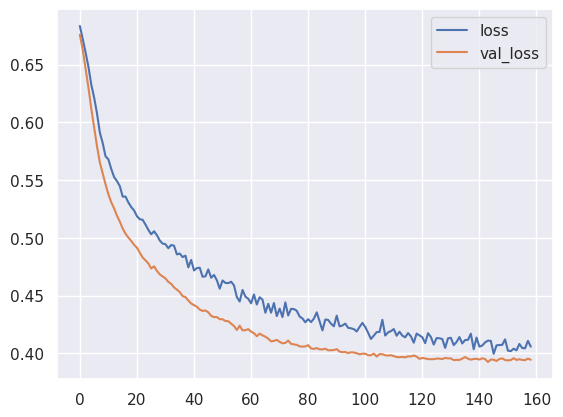

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

66/66 [==============================] - 0s 1ms/step


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[827 220]
 [185 851]]


              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1047
           1       0.79      0.82      0.81      1036

    accuracy                           0.81      2083
   macro avg       0.81      0.81      0.81      2083
weighted avg       0.81      0.81      0.81      2083



In [45]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [46]:
test_data['CryoSleep'] = test_data['CryoSleep'].apply(lambda x: 1 if x==True else 0)
test_data[['Deck','Deck_Number','Deck_side']] = test_data ['Cabin'].str.split("/", expand = True)
test_data = test_data.drop('Cabin', axis=1)
test_data ['VIP'] = test_data ['VIP'].apply(lambda x: 1 if x==True else 0)


In [47]:
(test_data.isnull().sum()/len(test_data))*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       0.000000
Destination     2.151040
Age             2.127660
VIP             0.000000
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
Deck            2.338087
Deck_Number     2.338087
Deck_side       2.338087
dtype: float64

In [48]:
test_data = test_data.fillna(method="ffill")

In [49]:
(test_data.isnull().sum()/len(test_data))*100

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Deck            0.0
Deck_Number     0.0
Deck_side       0.0
dtype: float64

In [50]:
feature1 = test_data[['HomePlanet', 'Destination','Deck','Deck_side']]
dummies1= pd.get_dummies(feature1,drop_first=True)
test_data = pd.concat([test_data.drop(feature1,axis=1),dummies1],axis=1)

In [51]:
test_data.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Deck_Number',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_side_S'],
      dtype='object')

In [52]:
for_test = test_data.drop(['PassengerId','Name'],axis=1)

In [53]:
for_test = scaler.transform(for_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [54]:
for_test

array([[1.        , 0.34177215, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.24050633, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39240506, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.53164557, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53164557, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5443038 , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [55]:
predictnew = (model.predict(for_test) > 0.5).astype("int32")

134/134 [==============================] - 0s 1ms/step


In [56]:
predictnew

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [57]:
predictnew = pd.DataFrame(predictnew).astype(bool) 

In [58]:
output = pd.DataFrame()
output['PassengerId'] = test_data['PassengerId']
output['Transported'] = predictnew
output.to_csv('submission.csv', index=False)

In [59]:
output

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
